In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the data
df = pd.read_csv('insurance.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())

Dataset Shape: (1338, 7)

First 5 rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Descriptive Statistics:
           

In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Encode categorical variables
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])
df['region_encoded'] = label_encoder.fit_transform(df['region'])

# Create features and target
X = df[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']]
y = df['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Missing values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
Training set size: (1070, 6)
Test set size: (268, 6)


In [6]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model coefficients
print("Model Coefficients:")
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
for feature, coef in zip(feature_names, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Model Coefficients:
age: 257.06
sex: -18.79
bmi: 335.78
children: 425.09
smoker: 23647.82
region: -271.28
Intercept: -11946.61


In [8]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\nModel Performance:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

# R-squared score
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f"R-squared (Training): {train_score:.4f}")
print(f"R-squared (Testing): {test_score:.4f}")


Model Performance:
Mean Absolute Error (MAE): $4186.51
Root Mean Squared Error (RMSE): $5799.59
R-squared (Training): 0.7417
R-squared (Testing): 0.7833


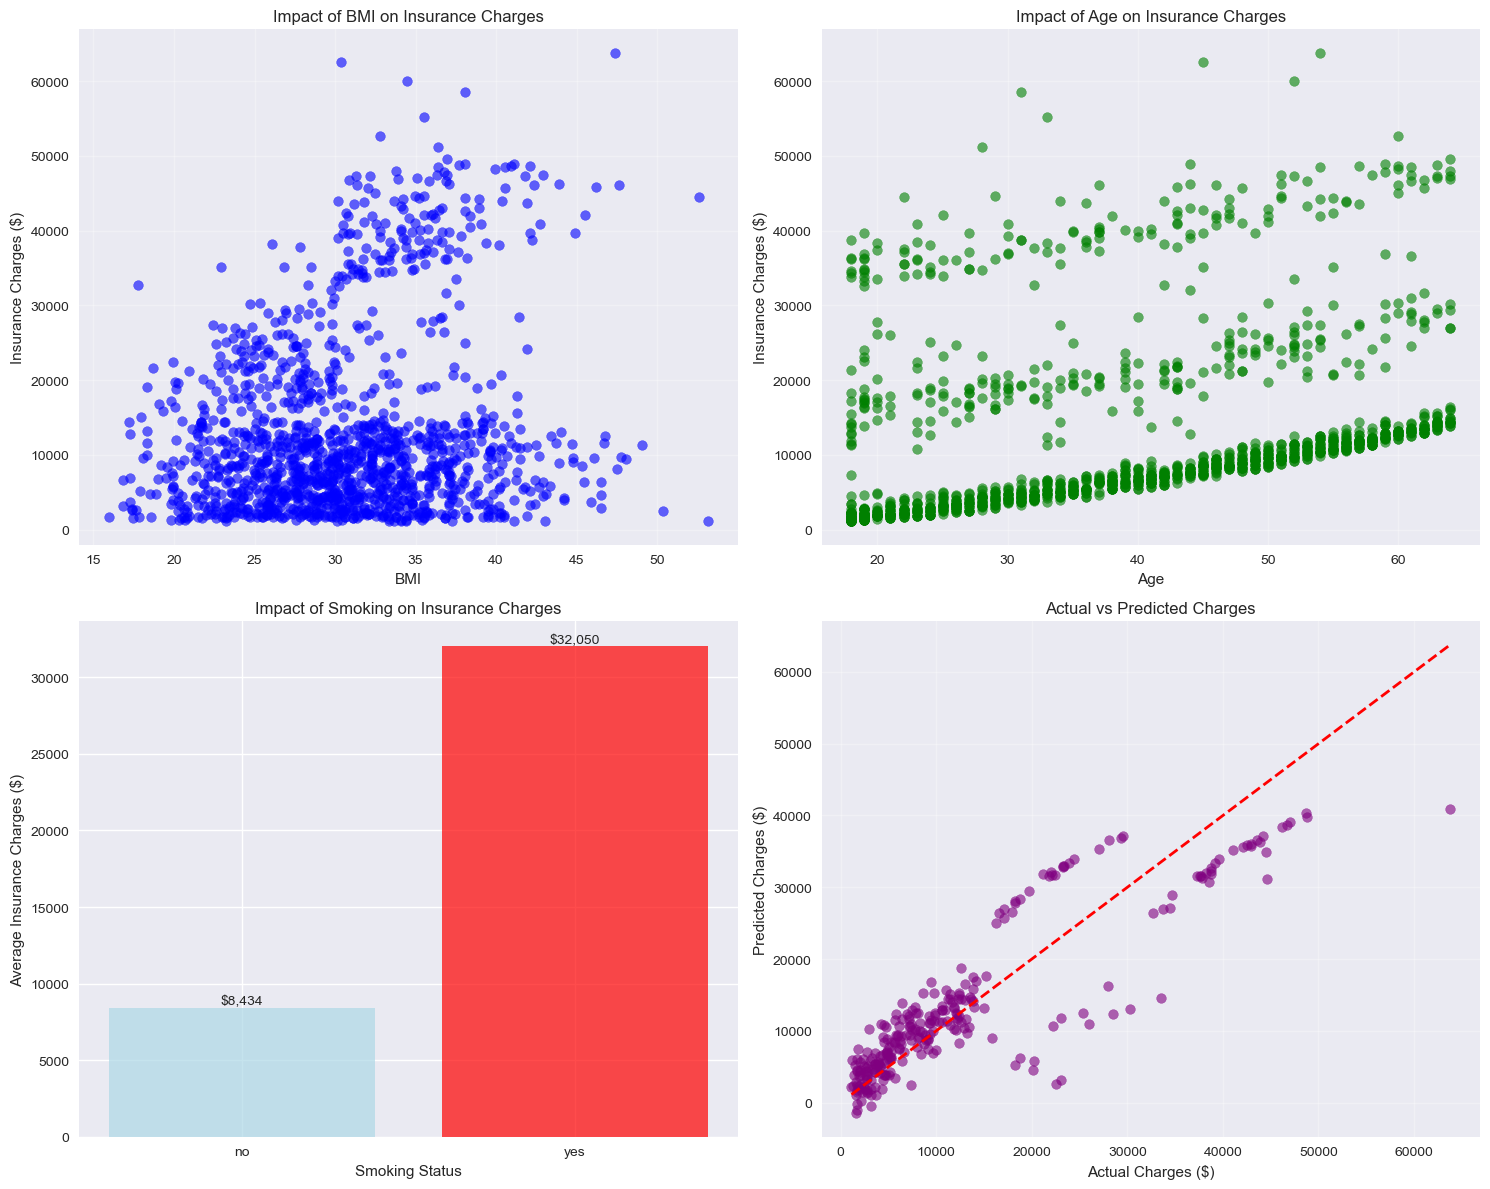

In [10]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. BMI vs Charges
axes[0,0].scatter(df['bmi'], df['charges'], alpha=0.6, color='blue')
axes[0,0].set_xlabel('BMI')
axes[0,0].set_ylabel('Insurance Charges ($)')
axes[0,0].set_title('Impact of BMI on Insurance Charges')
axes[0,0].grid(True, alpha=0.3)

# 2. Age vs Charges
axes[0,1].scatter(df['age'], df['charges'], alpha=0.6, color='green')
axes[0,1].set_xlabel('Age')
axes[0,1].set_ylabel('Insurance Charges ($)')
axes[0,1].set_title('Impact of Age on Insurance Charges')
axes[0,1].grid(True, alpha=0.3)

# 3. Smoking Status vs Charges
smoker_charges = df.groupby('smoker')['charges'].mean()
colors = ['lightblue', 'red']
axes[1,0].bar(smoker_charges.index, smoker_charges.values, color=colors, alpha=0.7)
axes[1,0].set_xlabel('Smoking Status')
axes[1,0].set_ylabel('Average Insurance Charges ($)')
axes[1,0].set_title('Impact of Smoking on Insurance Charges')
for i, v in enumerate(smoker_charges.values):
    axes[1,0].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# 4. Actual vs Predicted
axes[1,1].scatter(y_test, y_pred, alpha=0.6, color='purple')
axes[1,1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,1].set_xlabel('Actual Charges ($)')
axes[1,1].set_ylabel('Predicted Charges ($)')
axes[1,1].set_title('Actual vs Predicted Charges')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

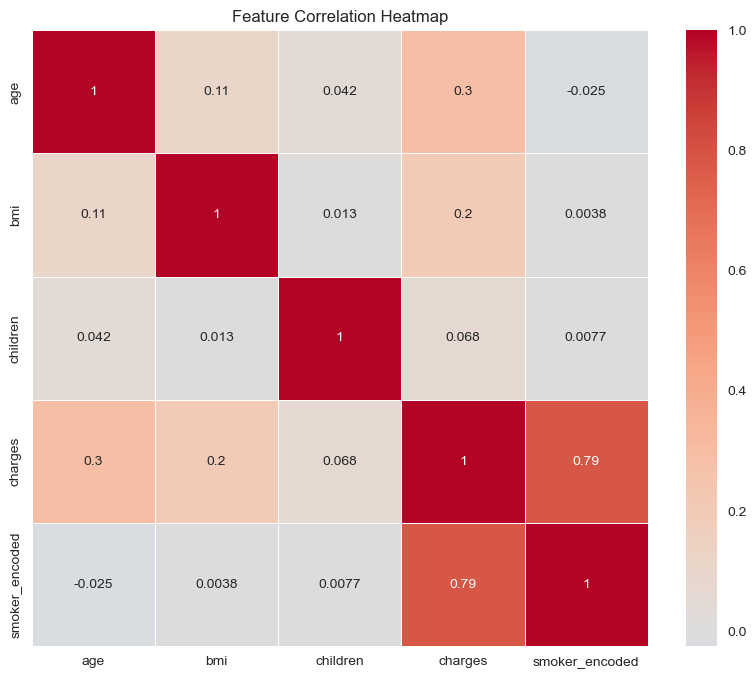

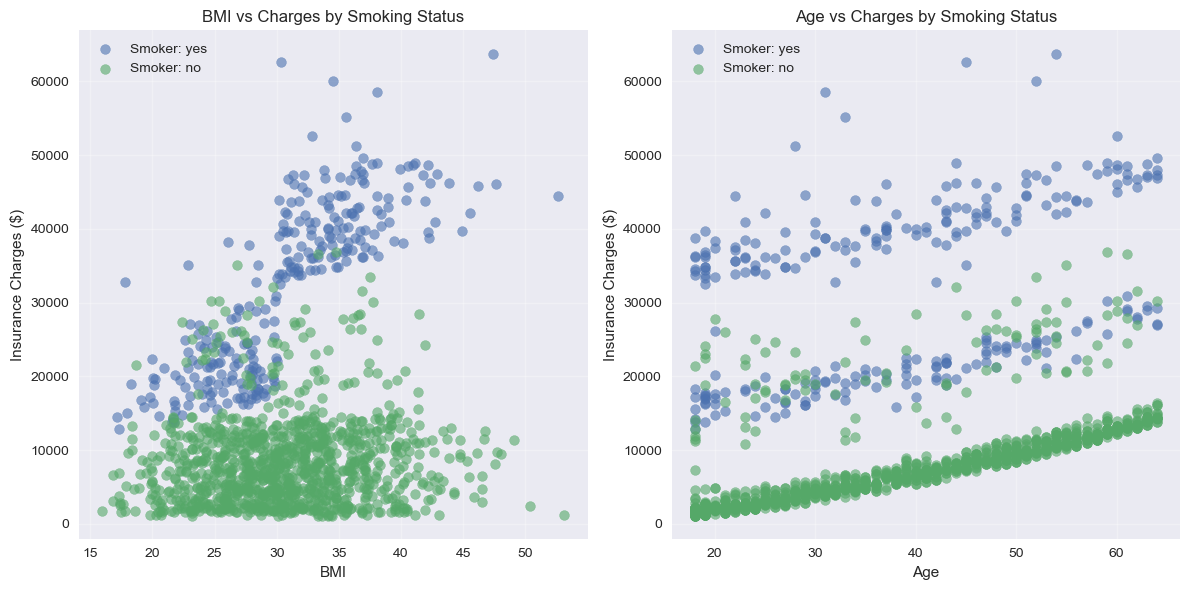

In [12]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
numeric_df = df[['age', 'bmi', 'children', 'charges', 'smoker_encoded']]
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Combined effect of BMI and Smoking
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for smoker in df['smoker'].unique():
    subset = df[df['smoker'] == smoker]
    plt.scatter(subset['bmi'], subset['charges'], alpha=0.6, 
               label=f'Smoker: {smoker}', s=50)
plt.xlabel('BMI')
plt.ylabel('Insurance Charges ($)')
plt.title('BMI vs Charges by Smoking Status')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for smoker in df['smoker'].unique():
    subset = df[df['smoker'] == smoker]
    plt.scatter(subset['age'], subset['charges'], alpha=0.6, 
               label=f'Smoker: {smoker}', s=50)
plt.xlabel('Age')
plt.ylabel('Insurance Charges ($)')
plt.title('Age vs Charges by Smoking Status')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Feature Importance (by coefficient magnitude):
    feature   coefficient  abs_coefficient
4    smoker  23647.818096     23647.818096
3  children    425.091456       425.091456
2       bmi    335.781491       335.781491
5    region   -271.284266       271.284266
0       age    257.056264       257.056264
1       sex    -18.791457        18.791457


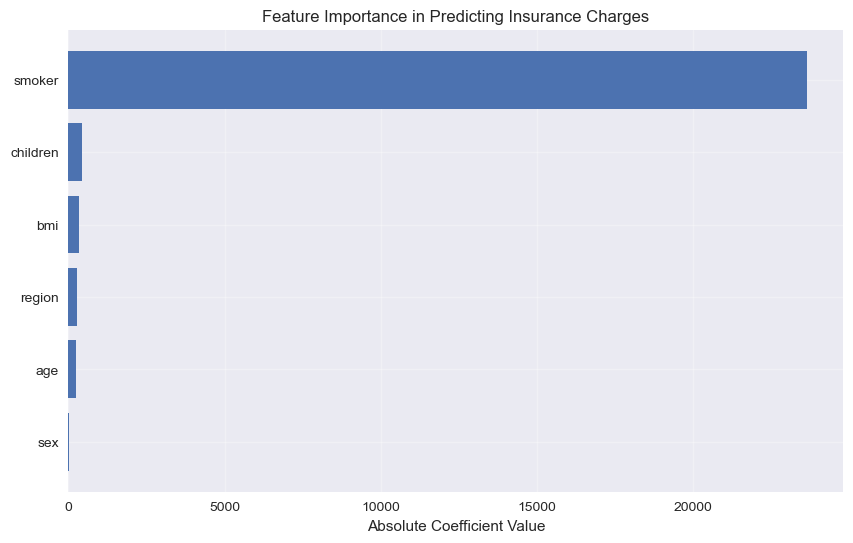

In [14]:
# Feature importance based on coefficients
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'coefficient': model.coef_,
    'abs_coefficient': np.abs(model.coef_)
}).sort_values('abs_coefficient', ascending=False)

print("\nFeature Importance (by coefficient magnitude):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['abs_coefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance in Predicting Insurance Charges')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.show()

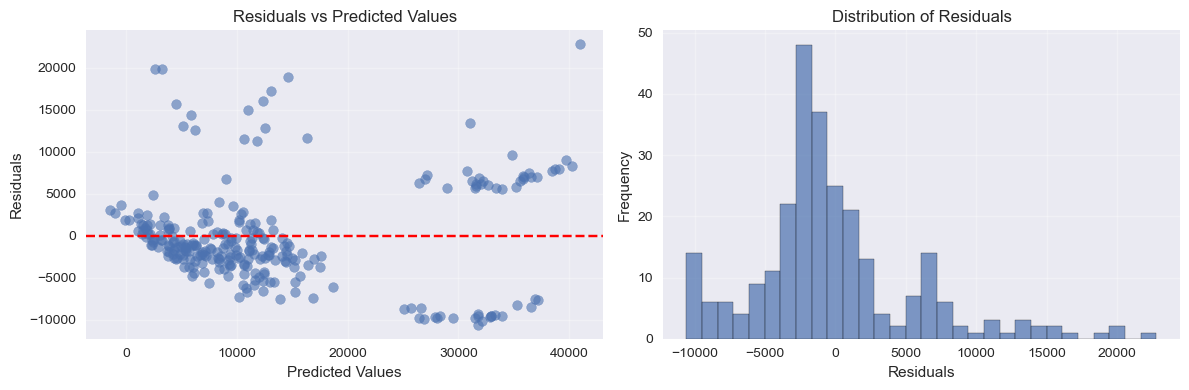

In [16]:
# Residual analysis
residuals = y_test - y_pred

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()